In [201]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from numpy.random import normal
from numpy.random import uniform

###  Problem-1: Confined diffusion.
#### Simulate 2D random walk in a circular confinement. Re-write 2D brownian motion code to simulate diffusion of a particle which is stuck inside a sphere. Study how root mean square deviation of position scales with time. Carry out simulations for different confinement sizes. Make plots of simulated trajectories.</div>

In [202]:
list=[1,2,3,4]

In [203]:
list.append('10')

In [204]:
list

[1, 2, 3, 4, '10']

In [206]:
# Inserting reflecting ball boundary for 2d Brownian motion

def brown2D_R(nT,D=1.0,dt=1.0,bound_R=20):
    """ Generating Brownian displacements in 2 dimensions 
    confined to boundary circle with radisu R
    ----------
    nT:   number of time measurmenets
    D: Diffusion coefficient
    dt: time step
    bound_R: boundary 
    Returns: displacements in x and y
    ------- """
    C = np.sqrt(2*D*dt)
    X,Y=0,0       # Initial point
    Xt,Yt=[X],[Y] # Record of t points 

    while(nT>0):

        # Make a single step using numpy standard normal     
        normDisX = C*np.random.randn(1)  # Same as C*normal(0, 1, 1)
        normDisY = C*np.random.randn(1) 
     
        #Confine the brownian particle in a sphere R
        R = np.sqrt((X + normDisX)**2 + (Y + normDisY)**2) 
        
        if(R <= bound_R):
            X+=normDisX[0]
            Y+=normDisY[0]
            Xt.append(X)
            Yt.append(Y) 
            nT=nT-1 # count step
            
    return (np.array(Xt),np.array(Yt))

In [214]:
xx,yy=brown2D_R(2000,D=1.0,dt=1.0,bound_R=20)
xx.shape,yy.shape

((2001,), (2001,))

Text(0, 0.5, '$y$ displacement, [L]')

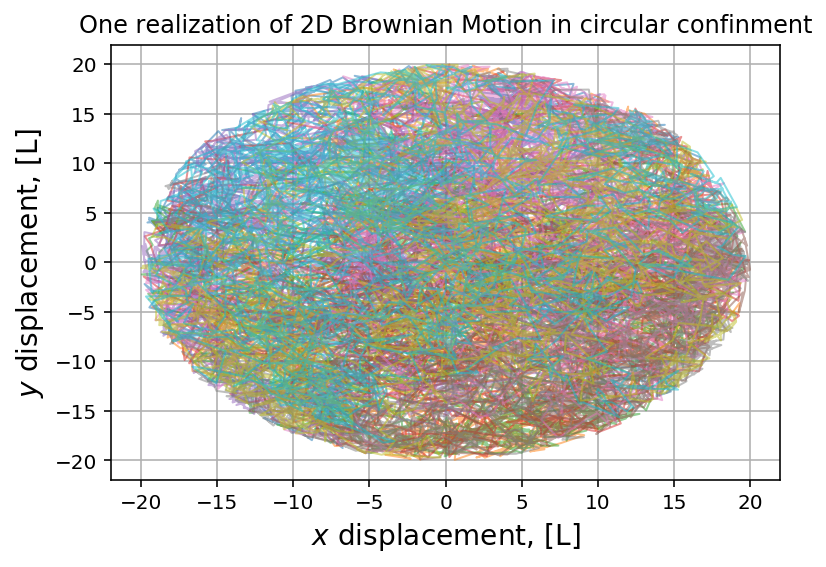

In [207]:
# Now lets generate brownian motion in a circe R=100
fig,ax=plt.subplots(figsize=(6,4))
ax.grid(True)

for i in range(10):
    Xt,Yt=brown2D_R(2000,D=1.0,dt=1.0,bound_R=20)
    ax.plot(Xt, Yt,'-',lw=1,alpha=0.5)
    
ax.set_title("One realization of 2D Brownian Motion in circular confinment")
ax.set_xlabel("$x$ displacement, [L]",fontsize=14)
ax.set_ylabel("$y$ displacement, [L]",fontsize=14)

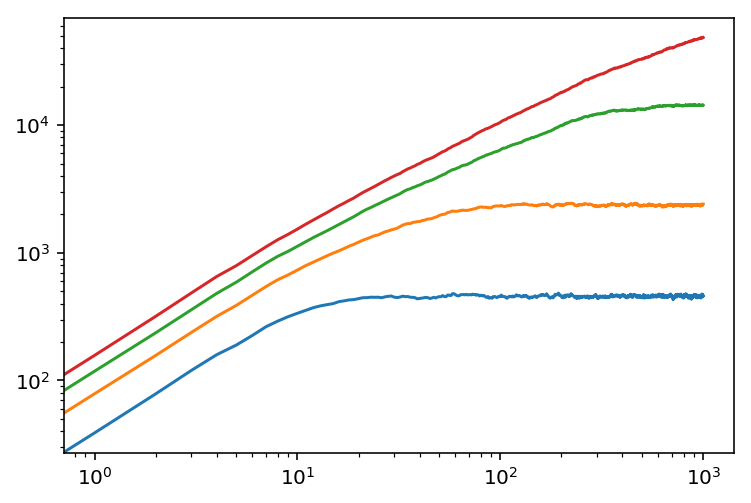

In [105]:
r=0     
n=10 # trajectories

for radius in [10,20,50,100]:
    for i in range(1000):
        x,y=brown2D_R(nT=1000,D=1.0,dt=1.0,bound_R=radius)
        r+=x**2+y**2

    rsd=r/100 # <r>=0 so sigma^2=<r^2>
    
    plt.loglog(np.range(nT),rsd)

###  Problem-2: Continuous time random walk (CTRW)
#### Simulate 1D random walk but instead of picking times at regular intervals pick them from  exponential distribution. Hint: you may want to use random variables from scipy.stats.expon https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html <br>Study the root mean square deviation as a function of exponential decay parameter $\lambda$ of exponential distribution $e^{-\lambda x}$. 

In [216]:
from scipy.stats import expon
from numpy.random import choice



Before using random numbers sampled from some analytic probability distribution it is useful to take a look at the mean and variance: $$E[x] =\frac{1}{\lambda} \int^{+\infty}_0  x e^{-\lambda x}dx=\frac{1}{\lambda}$$
and variance is $V[x] =1/\lambda^2$. 

Let us study on average how many random times should we generate for our random walker to reach a target T=10 (seconds, miniutes, units etc) time of simulation. 

In [217]:
lamb=1 # Let us vary lamb and look at the last element
T=10   # define a time we want to reach

expon.rvs(scale=1/lamb,size=T*lamb).cumsum(axis=0) 

# mean and stadard deviation are = 1/lamb for poisson distirbuton (exponential with k=1)

array([1.06955907, 1.22954614, 1.85787563, 2.69834767, 4.76702092,
       5.78757414, 5.9728726 , 6.22752266, 6.57906087, 6.60406773])

Clearly, the random numbers sampled from exponential distirbution are smaller the bigger the exponent $\lambda$ hence larger sample size will be needed to reach a target time T for larger $\lambda$ values. This is in contrast with orindery random walk where all steps are done at the same intervals dt=1 and number of steps to reach T is always the same. 

In [209]:
def ctrw(lamb,T,ntraj):
    
    '''Continuous time random walk simulation in 1D
    lamb:  value of lambda in p(x)=(1/lamb)*exp(-lamb*x)
    T:     simulation time
    ntraj: number of trajecotries
    '''
    
    # We can either use while loop and sample times until reching T.
    # Or we can generate n_times at once and keep the ones up untill T. 
    n_steps=int(lamb*T+1/lamb)    
    
    #Compute times of random jumps and keep times untill T
    rw_t=expon.rvs(scale=1/lamb,size=n_steps).cumsum(axis=0)
    rw_t=rw_t[rw_t<T] 
        
    #Compute jump values at each time for ntraj trajectories
    rw_x=choice([-1,1],size=(len(rw_t), ntraj)).cumsum(axis=0) 
    
    # for an array of sampled times rw_t we get different trajectories of rw_x in the form of (rw_t, ntraj) 
    return rw_t, rw_x  

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


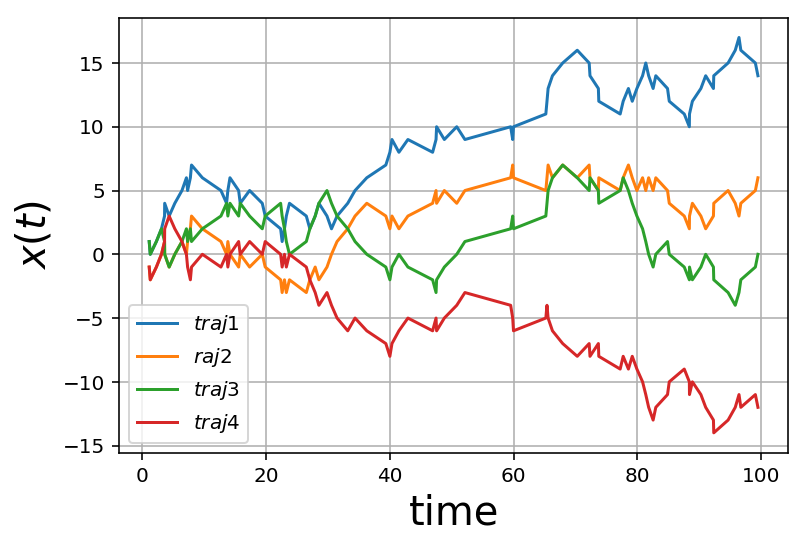

In [227]:
%time
T=100

# different trajectories for a particular lambda
rw_t,rw_x=ctrw(1,T,ntraj=4)

plt.plot(rw_t,rw_x[:,0])
plt.plot(rw_t,rw_x[:,1])
plt.plot(rw_t,rw_x[:,2])
plt.plot(rw_t,rw_x[:,3])

plt.legend(['$traj1$','$\traj2$','$traj3$','$traj4$'])
plt.xlabel('time',fontsize=20)
plt.ylabel('$x(t)$',fontsize=20)
plt.grid(True)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


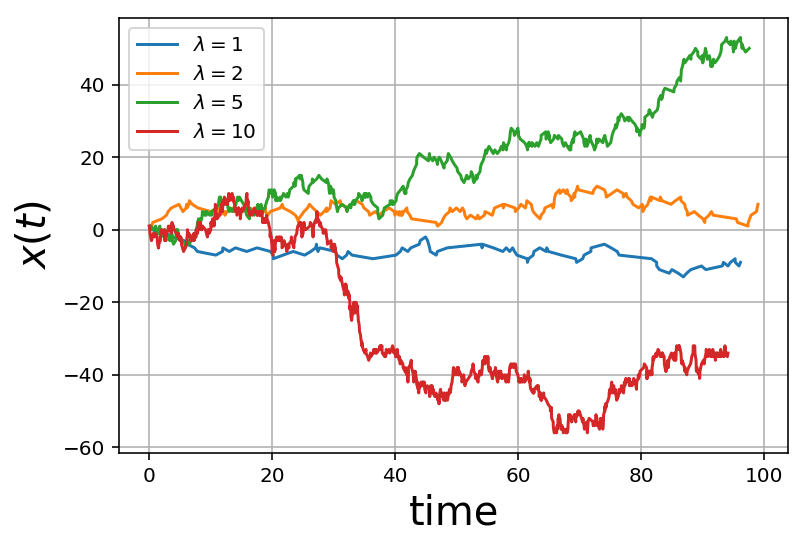

In [210]:
%time
T=100

# different values of lambda
for ll in [1,2,5,10]:
    rw_t,rw_x=ctrw(ll,T,ntraj=1)
    plt.plot(rw_t,rw_x)

plt.legend(['$\lambda=1$','$\lambda=2$','$\lambda=5$','$\lambda=10$'])
plt.xlabel('time',fontsize=20)
plt.ylabel('$x(t)$',fontsize=20)
plt.grid(True)

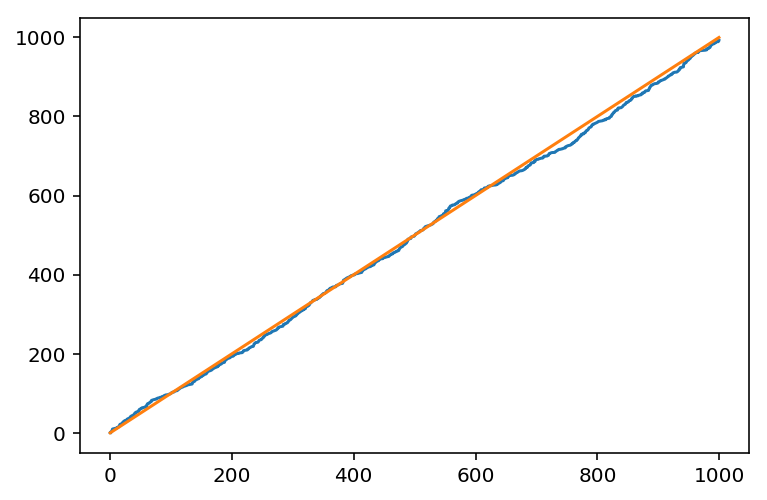

In [229]:
t,x=ctrw(1,T=1000,ntraj=10000)
plt.plot(t,(x**2).mean(axis=1))
plt.plot(t,1*t)

### Problem-3: Monte Carlo, crude version.

#### Evaluate the following integral using direct Monte Carlo simulation: use random numbers from uniform distribution on the interval $[0,2]$.  $\int^{2}_0 ( e^{-x^2}+e^{-x^4})dx$. plot the dependence of variance on the number of samples. Compare the result to numerical integration. 

Let us visualize how MC simulation converges towards the value of definite integral.

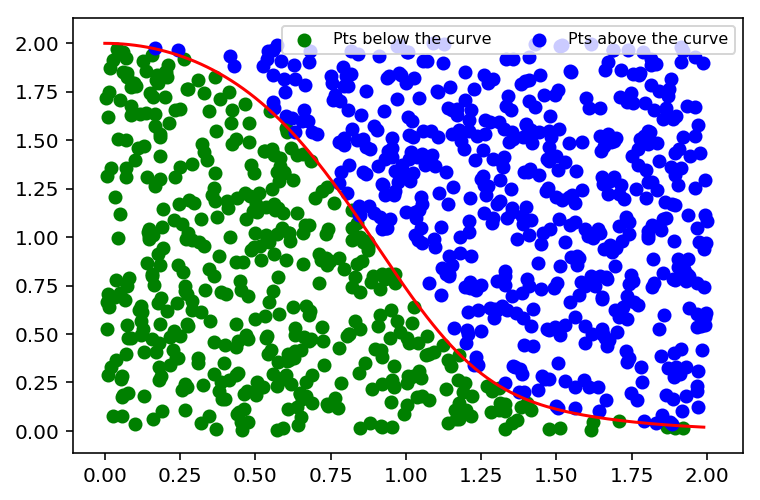

In [200]:
N = 1000
x0 = 0
x1 = 2

def f(x):
    """
    This is the function we want to integrate over from 0 to 2.
    """
    return np.e**(-x**2)+np.e**(-x**4)

x = np.arange(x0, x1, 0.01)
y = f(x)

fmax = max(y)

x_rand = x0 + (x1 - x0)*np.random.random(N)
y_rand = np.random.random(N)*fmax

ind_below = np.where(y_rand < f(x_rand))
ind_above = np.where(y_rand >= f(x_rand))

pts_below = plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "green")
pts_above = plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "blue")
plt.plot(x, y, color = "red")

plt.legend((pts_below, pts_above),
           ('Pts below the curve', 'Pts above the curve'),
           loc='upper right',
           ncol=3,
           fontsize=8)

In [107]:
import numpy as np
from numpy.random import uniform


def crude_monte_carlo(func, num_samples,xi,xf):
    """
    Perform Crude Monte Carlo for f(x) between [xi, xf] points. 
    -func: our target function f(x)
    - num_samples: num random points to generate for sampling fx
    -xi,xf: lower and upper boundary of integration
    - retrun:      crude Monte Carlo estimation (float)
    """
    
    f_sampled=[]
    for i in range(num_samples):
        x = np.random.uniform(xi, xf)
        f_sampled.append((xf - xi)*func(x))
    
    approx=np.mean(f_sampled)
    
    f_var=np.var(f_sampled)
    
    return approx, f_var

In [218]:
def ff_x(x):
    """
    This is the function we want to integrate over from 0 to 2.
    """
    return np.e**(-x**2)+np.e**(-x**4)

In [219]:
from scipy import integrate

y, err = integrate.quad(ff_x, 0, 2)
y,err 

(1.7884838644505239, 5.887961864218475e-13)

In [225]:
num_samples=20000 #Estimating function with n samples

approx, var_ff=crude_monte_carlo(ff_x,num_samples,0,2)

print(f"MC crude approximation: {approx} \nVariance within {num_samples} samples is: {var_ff} ")

MC crude approximation: 1.7964709142237099 
Variance within 20000 samples is: 2.306884679393546 


In [221]:
n_reps=500 # number of MC simulations to repeat for computing variance
n_points=[100,200,500,1000,2000]

var_ff_n=[]
for n in n_points:
    ff_n=[]  # approxumation to f with n samples
    
    for rr in range(n_reps):
        sampled_mean=crude_monte_carlo(ff_x,n,0,2)[0]  # sampled mean from one experiment
        ff_n.append(sampled_mean)
        
    var_ff_n.append(np.var(ff_n))

Text(0, 0.5, 'Variance as a function of n')

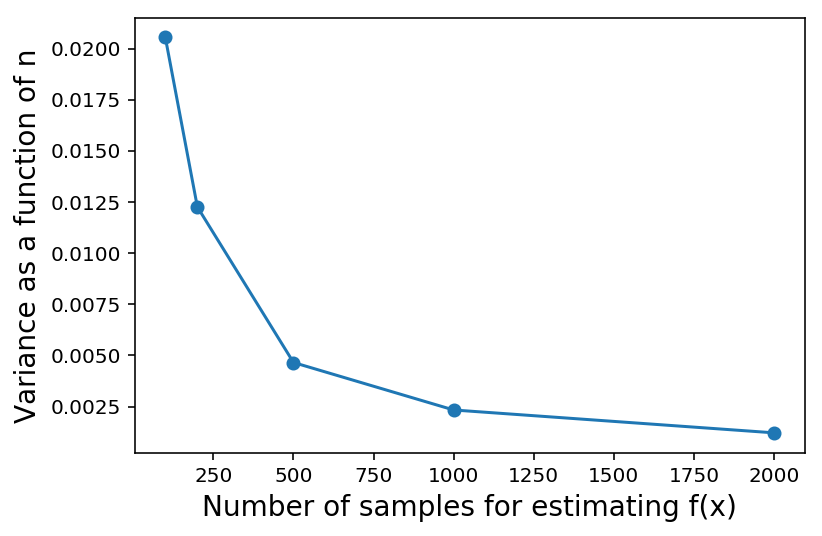

In [222]:
plt.plot(n_points,var_ff_n,'-o')
plt.xlabel('Number of samples for estimating f(x)',fontsize=14)
plt.ylabel('Variance as a function of n',fontsize=14)

### Problem-4: Monte Carlo, importance sampling. 

#### Evaluate the following integral $\int^{\infty}_0 \frac{e^{-x}}{1+(x-1)^2} dx$ using Monte Carlo methods. (i) Start by doing a direct monte carlo on uniform interval. (ii) Try an importance sampling approach using en exponential probability distribution. (iii) Find the optimal value of $\lambda $ that gives the most rapid reduction of variance [Hint: experiment with different values of $\lambda$]

In [226]:
def f_x(x):
    """
    This is the function we want to integrate over from 0 to inf.
    """
    return (np.e**(-1*x))/(1+(x-1)**2)

Text(0.5, 1.0, 'f(x)')

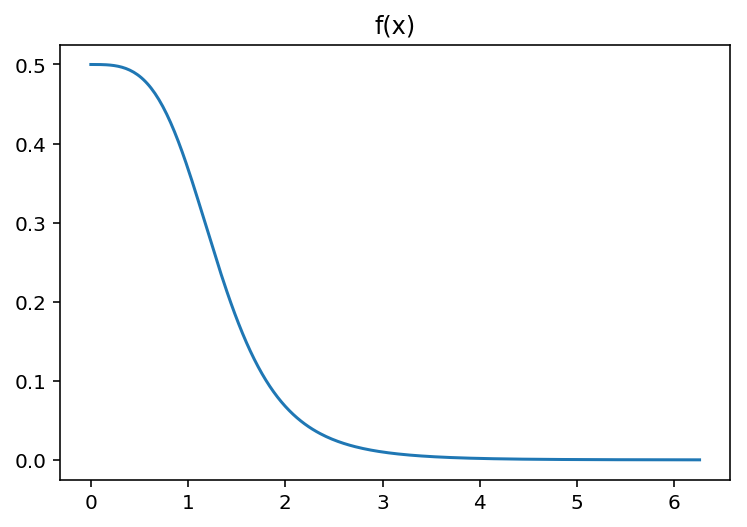

In [227]:
# Lets visualize our function and see why we may need importance sampling
xs = [float(i/50) for i in range(int(100*np.pi))]
ys = [f_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)")

In [102]:
np.random.rand()

0.44054127262216736

In [238]:
# Lets try crude monte carlo apporach first

MC_crude=crude_monte_carlo(f_x,10000,0,10)

print(f"MC curde result: {MC_crude}")

MC curde result: (0.680494394484789, 2.1298415568283517)


In [181]:
n_reps=500 # number of MC simulations to repeat for computing variance
n_points=[100,200,500,1000,2000]

var_ff_n=[]
for n in n_points:
    ff_n=[]  # approxumation to f with n samples
    
    for rr in range(n_reps):
        sampled_mean=crude_monte_carlo(f_x,n,0,10)[0]  # sampled mean from one experiment
        ff_n.append(sampled_mean)
        
    var_ff_n.append(np.var(ff_n))

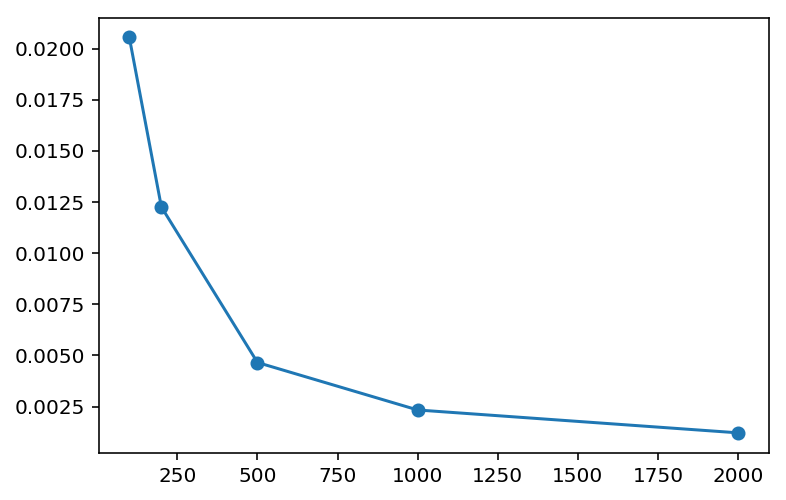

In [234]:
plt.plot(n_points, var_ff_n,'-o')

In [186]:
# Lets try importance sampling with a convneient function
def g_x(x,lamb):
    """
    Importance sampling function.
    """
    return lamb*np.e**(-lamb*x)

In [187]:
def MC_IS_exp(num_samples,lamb):
    
    f_sampled=[]
    
    for i in range(num_samples):
        #More general way: generate random number on r: [0,1] then from r=g(x) ==>  x=-1/lamb*log(r) 
        #then convert it to functional form  of an arbutrary IS unction g(x)       
        #x = expon.rvs(scale=1/lamb)
        x=-1/lamb*np.log(np.random.rand())    
        
        
        f_sampled.append(f_x(x)/g_x(x,lamb))
        
    approx = np.mean(f_sampled)
    f_var  = np.var(f_sampled)
    
    return (approx, f_var)  # the variane is from a long traj you can also do many independent runs optimizie

In [235]:
MC_IS_exp(100000,1.0) # can play around values of lambda to get an idea of a resonable range

(0.6947258098864589, 0.05516751255077715)

In [189]:
test_lambdas = [0.5,0.75,1,1.25,1.5,1.75,2] # range is chosen
variances = []

trials=[MC_IS_exp(10000,ll)[1] for ll in test_lambdas]
variances.append(trials)

In [193]:
variances[0]

[0.2541041546385493,
 0.10553412796548657,
 0.05461123855286309,
 0.04998266564315089,
 0.07612019475096021,
 0.13404480834826224,
 0.22323046276998165]

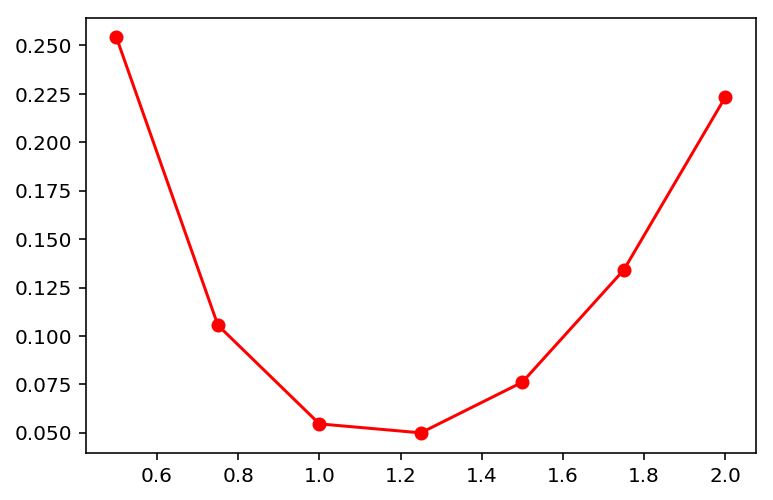

In [194]:
plt.plot(test_lambdas,variances[0],'-o',color='red')